#### Part I Experiments

####  Required Python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

In [4]:
# Importing functions from another jupyter notebook
!pip install nbimporter

In [5]:
%run GlobalConfig.ipynb

Setting global variables...


In [6]:
import nbimporter
import loader_nb
import model_selection_helper_nb

loader = loader_nb.UrlDatasetLoader()

init Loader notebook


In [7]:
help(loader.load_data)

Help on method load_data in module loader_nb:

load_data(url='https://raw.githubusercontent.com/quickheaven/scs-3253-machine-learning/master/datasets/ISCX-URL2016_All.csv') method of loader_nb.UrlDatasetLoader instance
    (string) --> dataframe
    
    This function returns the dataframe of maliciours url.    
    
    Parameters
    ----------
    url: By default, it fetch the data from github otherwise a local path or url can be provided so the data can be loaded faster.



In [8]:
help(loader.prepare_data)

Help on method prepare_data in module loader_nb:

prepare_data(data, fill_na=True, feature_selection=True) method of loader_nb.UrlDatasetLoader instance
    (DataFrame, boolean, boolean) --> X and y of the dataframe.
    
    This function returns the X and y of the malicious url dataframe.
    
    Parameters
    ----------
    fill_na : True to fill the na records with mean values otherwise drop the features.
    
    feature_selection : True to remove one or more features that have a correlation higher than 0.9 othewise do not perform that type of feature selection.
                        https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf



In [9]:
df = loader.load_data(DATASET_LOCAL_PATH)

In [10]:
def train_and_tune_models( data, fill_na=True, feature_selection=True, anomaly_detection=True):
    print('train_and_tune_models fill_na:', str(fill_na), 'feature_selection:', str(feature_selection), 'anomaly_detection:' + str(anomaly_detection))
    
    X, y = loader.prepare_data(data.copy(), fill_na=fill_na, feature_selection=feature_selection)
    
    from sklearn.model_selection import train_test_split    

    X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, anomaly_detection=anomaly_detection)
    
    models_to_train = loader.get_models_to_train()
    parameters_to_train = loader.get_parameters_to_train(True)
    
    model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)
    
    model_selection_helper.fit(X_train, y_train, cv=3, scoring='accuracy', verbose=2)
    

In [11]:
%%time
# TRUE TRUE TRUE
#train_and_tune_models(df, fill_na=True, feature_selection=True, anomaly_detection=True)

Wall time: 0 ns


In [12]:
%%time
# TRUE TRUE FALSE
#train_and_tune_models(df, fill_na=True, feature_selection=True, anomaly_detection=False)

Wall time: 0 ns


In [13]:
%%time
# TRUE FALSE FALSE
# train_and_tune_models(df, fill_na=True, feature_selection=False, anomaly_detection=False)

Wall time: 0 ns


In [14]:
%%time
# FALSE FALSE FALSE
# train_and_tune_models(df, fill_na=False, feature_selection=False, anomaly_detection=False)

Wall time: 0 ns


In [15]:
%%time
# FALSE TRUE TRUE
# train_and_tune_models(df, fill_na=False, feature_selection=True, anomaly_detection=True)

Wall time: 0 ns


In [16]:
%%time
# FALSE FALSE TRUE
# train_and_tune_models(df, fill_na=False, feature_selection=False, anomaly_detection=True)

Wall time: 0 ns


#### Experiment: Find which data preparation setup return better result.

In [17]:
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

def eval_data_prep(X, y, anomaly_detection=False): 
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
    
    #if (anomaly_detection==True):
        #iforest = IsolationForest(contamination=0.01, random_state=RANDOM_STATE).fit(X_train)

        #y_pred_iforest = iforest.predict(X_train)

        #X_train, y_train = X_train[(y_pred_iforest != -1)], y_train[(y_pred_iforest != -1)]        

    #lr_clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)

    #lr_clf.fit(X_train, y_train)

    #y_pred_lr = lr_clf.predict(X_train)

    #return accuracy_score(y_train, y_pred_lr)
    return None

In [18]:
#### 

In [19]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df) # default
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y))

(36707, 51)
(36707,)
None


In [20]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=True, feature_selection=False)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y))

(36707, 78)
(36707,)
None


In [21]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=True)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y))

(18982, 49)
(18982,)
None


In [22]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=False)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y))

(18982, 78)
(18982,)
None


#### Experiment: Unsupervised Anomaly Detection

In [23]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df) # default
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y, anomaly_detection=True))

(36707, 51)
(36707,)
None


In [24]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=True, feature_selection=False)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y, anomaly_detection=True))

(36707, 78)
(36707,)
None


In [25]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=True)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y, anomaly_detection=True))

(18982, 49)
(18982,)
None


In [26]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df, fill_na=False, feature_selection=False)
print(X.shape)
print(y.shape)
print(eval_data_prep(X, y, anomaly_detection=True))

(18982, 78)
(18982,)
None


### Determine the optimium parameters for Isolation Forest
The data is pretty already clean hence there is only a small amount of outliers. Because of that I will simply use contamination=0.2

In [27]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df)

X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


In [28]:
%%time
#https://medium.com/analytics-vidhya/anomaly-detection-using-isolation-forest-algorithm-8cf36c38d6f7
#https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection
#https://medium.com/@y.s.yoon/isolation-forest-anomaly-detection-identify-outliers-101123a9ff63
'''
from sklearn import model_selection

model = IsolationForest(random_state=RANDOM_STATE)

param_grid = {
              #'n_estimators': [1000, 1500], 
              #'max_samples': [10], 
              #'contamination': ['auto', 0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], 
              'contamination': [0.04, 0.05, 0.10, 0.20], 
              #'max_features': [10, 15], 
              #'bootstrap': [True], 
              #'n_jobs': [-1]
            }

grid_search = model_selection.GridSearchCV(model, 
                                           param_grid,
                                           scoring="neg_mean_squared_error", 
                                           refit=True,
                                           cv=5, 
                                           return_train_score=True,
                                           verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.fit(X_train, y_train)

print('Optimum parameters', best_model.best_params_)

#Optimum parameters {'bootstrap': True, 'contamination': 0.0001, 'max_features': 10, 'max_samples': 10, 'n_estimators': 1500, 'n_jobs': -1}
#Wall time: 1h 2min 32s
'''

Wall time: 0 ns


'\nfrom sklearn import model_selection\n\nmodel = IsolationForest(random_state=RANDOM_STATE)\n\nparam_grid = {\n              #\'n_estimators\': [1000, 1500], \n              #\'max_samples\': [10], \n              #\'contamination\': [\'auto\', 0.01, 0.02, 0.03, 0.04, 0.05, 0.10, 0.20], \n              \'contamination\': [0.04, 0.05, 0.10, 0.20], \n              #\'max_features\': [10, 15], \n              #\'bootstrap\': [True], \n              #\'n_jobs\': [-1]\n            }\n\ngrid_search = model_selection.GridSearchCV(model, \n                                           param_grid,\n                                           scoring="neg_mean_squared_error", \n                                           refit=True,\n                                           cv=5, \n                                           return_train_score=True,\n                                           verbose=2)\ngrid_search.fit(X_train, y_train)\n\nbest_model = grid_search.fit(X_train, y_train)\n\nprint(\'

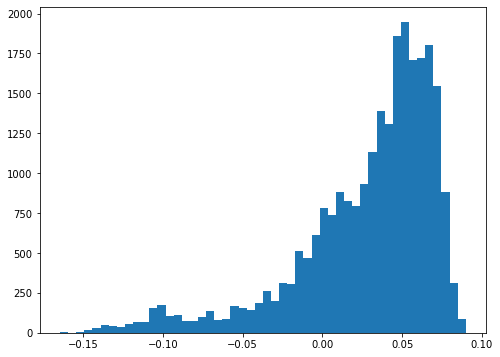

In [29]:
iso_Forest = IsolationForest(random_state=RANDOM_STATE, contamination=0.2)

iso_Forest.fit(X_train)

scores =  iso_Forest.decision_function(X_train)

plt.figure(figsize=(8, 6))

plt.hist(scores, bins=50);

### Naive Bayes

In [30]:
df = loader.load_data(url=DATASET_LOCAL_PATH)
X, y = loader.prepare_data(df)

X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# https://www.kaggle.com/code/akshaysharma001/naive-bayes-with-hyperpameter-tuning/notebook

#models_to_train = loader.get_models_to_train()
#parameters_to_train = loader.get_parameters_to_train(is_best_params=True)

models_to_train = dict()
models_to_train['GaussianNB'] = GaussianNB()
models_to_train['MultinomialNB'] = MultinomialNB()

params_gnb = dict()
params_mnb = dict()
params_mnb['alpha']=[0.50, 1.0, 2.0] 
#params_mnb['class_prior']=[None] 
params_mnb['fit_prior']=[True, False]

parameters_to_train = dict()
parameters_to_train['GaussianNB'] = params_gnb
parameters_to_train['MultinomialNB'] = params_mnb

model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)

init model selection helper notebook


In [61]:
%%time

model_selection_helper.fit(X_train, y_train, cv=2, scoring='accuracy', verbose=2)

---------------------------------------------------------------------------
GaussianNB
Fitting 2 folds for each of 1 candidates, totalling 2 fits
GaussianNB :  {}
0.5629200591824041
---------------------------------------------------------------------------
MultinomialNB
Fitting 2 folds for each of 6 candidates, totalling 12 fits
MultinomialNB :  {'alpha': 1.0, 'fit_prior': False}
0.6267248536880898
Wall time: 610 ms
